In [42]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from collections import defaultdict

In [43]:
# import dataset
data = pd.read_csv("data/up-selling/peotv/peoTV_user_ratings.csv")
try:
    data.drop(["Unnamed: 0"],axis=1,inplace=True)
except:
    pass
data_pca = data[["ACCOUNT_NUM.hash","package","pca_ratings"]].rename(columns={"pca_ratings":"ratings"})
data_pca.dropna(subset=["ratings"],inplace=True)
data = data[["ACCOUNT_NUM.hash","package","ratings"]]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179895 entries, 0 to 179894
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ACCOUNT_NUM.hash  179894 non-null  object 
 1   package           179894 non-null  object 
 2   ratings           179894 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.1+ MB


In [45]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159415 entries, 0 to 159414
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ACCOUNT_NUM.hash  159414 non-null  object 
 1   package           159414 non-null  object 
 2   ratings           159415 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.9+ MB


## Interaction Matrix

In [46]:
# create a histogram of all the interactions by all the users present in the dataset
def create_interaction_matrix(data):
    interactions = data.groupby('ACCOUNT_NUM.hash').count()['package']
    plt.hist(interactions,bins=20)
    plt.show()

    # create the user item matrix using the ratings dataset - Hint: try using pivot function 
    interactions_metrix = data.pivot_table(index="ACCOUNT_NUM.hash", columns="package", values="ratings",aggfunc=np.sum)
    # replace all the missing values with zero
    return interactions_metrix.fillna(0)

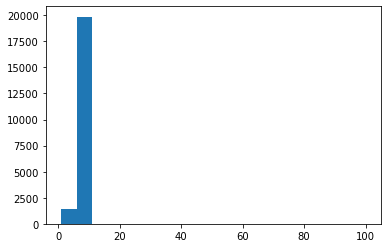

package,BOC,CHEER,DOUBLEPROMO,GMOA_Consultant_AO_MO_Plus,GMOA_MO_Medical,JOY,LEISURE_SPORTS,LIFE_TV,LOTUS,LOTUS_FTTH,...,PEO_VIRUSARA_VARAPPRASADA,PRANAMA,PRANAMA_FTTH,SLTStaff_PEO_SILVER,SLTStaff_PEO_UNNATHAM,SLT_SHARE_HOLDER_PACKAGE,SLT_STAFF_PEO_SILVER_FTTH,SLT_STAFF_PEO_UNNATHAM_FTTH,SLT_STAFF_TRIPLE_PLAY,SUMATHI_GROUP
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
0003102d10a11c8f2f0f241f00a36b2d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00092b1fd47eb05d000a3553ae072056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00094326efae1d73371d118204e12e46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000f325a72b9d24742237070939b57d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00108d48e89eb901236da1a14b854e7d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff25ad7f2b1ccf36fa3573e5582f0bf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff9148b195a844454cf5b07c2fccbcb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffaeeddaabbd2868c183d8884b2a98d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
create_interaction_matrix(data)

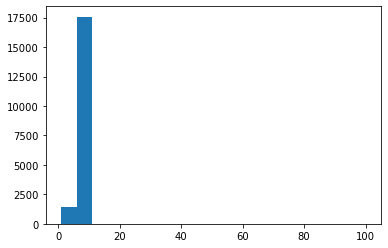

package,BOC,CHEER,DOUBLEPROMO,GMOA_Consultant_AO_MO_Plus,GMOA_MO_Medical,JOY,LEISURE_SPORTS,LIFE_TV,LOTUS,LOTUS_FTTH,...,PEO_VIRUSARA_VARAPPRASADA,PRANAMA,PRANAMA_FTTH,SLTStaff_PEO_SILVER,SLTStaff_PEO_UNNATHAM,SLT_SHARE_HOLDER_PACKAGE,SLT_STAFF_PEO_SILVER_FTTH,SLT_STAFF_PEO_UNNATHAM_FTTH,SLT_STAFF_TRIPLE_PLAY,SUMATHI_GROUP
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
0003102d10a11c8f2f0f241f00a36b2d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00092b1fd47eb05d000a3553ae072056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00108d48e89eb901236da1a14b854e7d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0012bc728800736f56ee2c18d26e15ed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0013519e648e9718c56e1e6ccfb3b17d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff25ad7f2b1ccf36fa3573e5582f0bf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff9148b195a844454cf5b07c2fccbcb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffaeeddaabbd2868c183d8884b2a98d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
create_interaction_matrix(data_pca)

## Function Definition

In [49]:
def train_test_splitter(data):
    reader = Reader(rating_scale=(0, 1))
    data_model = Dataset.load_from_df(data, reader)
    return data_model,train_test_split(data_model, test_size=.20)

In [50]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


In [51]:
def get_top_n(predictions, n=10):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:5]
        

    return top_n

In [52]:
# calculate NDCG
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

In [53]:
def top_n_pred(predictions):
    top_n = get_top_n(predictions, n=3)
    #print(top_n)
    users_est = defaultdict(list)
    users_true=defaultdict(list)
    rec_for_user=defaultdict(list)
    for uid, user_ratings in top_n.items():
        users_est[uid].append([est for (_, est,_) in user_ratings])
        users_true[uid].append([true_r for (_,_,true_r) in user_ratings])
        rec_for_user[uid].append([iid for (iid,_,_) in user_ratings])
    return top_n, users_est, users_true, rec_for_user

In [54]:
def calc_ndcg(users_true,users_est):
    ndcg_list=[]
    for uid in top_n:
        
        for i in users_true[uid]:
            y_true=np.asarray(i)#.reshape(-1,1)
        for i in users_est[uid]:
            y_pred=np.asarray(i)#.reshape(-1,1)
        
            ndcg_list.append(ndcg1(y_true, y_pred, k=None))

    ndcg_list = [i for i in ndcg_list if str(i) != 'nan']
    ndgc_rate = np.mean(ndcg_list)
    return ndcg_list, ndgc_rate

## Collabarative Recomenders with Surprise

In [55]:
data_model, (trainset, testset) = train_test_splitter(data)
data_model_pca, (trainset_pca, testset_pca) = train_test_splitter(data_pca)

### SVD recommender

In [56]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
svd_validate = cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2700  0.2688  0.2688  0.2677  0.2701  0.2691  0.0009  
MAE (testset)     0.2208  0.2192  0.2193  0.2183  0.2198  0.2195  0.0008  
Fit time          6.62    6.89    6.66    6.99    6.84    6.80    0.14    
Test time         0.23    0.22    0.45    0.22    0.23    0.27    0.09    


In [57]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

Top-N predictions

In [58]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

NDCG

In [59]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.9783051299701374


In [60]:
# dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [61]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1702,fd0340879a34dd91eaee5867ef569598,PEO_SILVER,0.503263,0.503321,{'was_impossible': False},9,82704,0.000058
30675,edd71b8a5e157cb656f56e9e3719f8df,PEO_UNNATHAM,0.448078,0.448139,{'was_impossible': False},9,3034,0.000061
26609,e422518e71a9fa586dd1a451e5a4e904,PEO_SILVER,0.365282,0.365201,{'was_impossible': False},7,82704,0.000081
5876,4f0b488d6030befe658c434046f5260a,PEO_SILVER,0.365288,0.365201,{'was_impossible': False},7,82704,0.000086
26815,67cc44d7ac117e763534aa6943047471,PEO_SILVER_FTTH,0.503270,0.503358,{'was_impossible': False},8,16995,0.000088
6705,05867635d36aee5a7658ffba720bc239,PEO_TITANIUM,0.448078,0.448168,{'was_impossible': False},9,1041,0.000090
7809,57c5c5d080f397ea2d180bbd39d1725b,PEO_SILVER_FTTH,0.475633,0.475528,{'was_impossible': False},7,16995,0.000105
17338,08a55b99da9d680d6c3d421f209d3092,PEO_UNNATHAM,0.448078,0.448190,{'was_impossible': False},8,3034,0.000112
12362,bfd2097c071d77e7ac5ff0a3294bb23a,PEO_SILVER,0.420475,0.420359,{'was_impossible': False},8,82704,0.000116
27162,bfd2097c071d77e7ac5ff0a3294bb23a,PEO_SILVER,0.420475,0.420359,{'was_impossible': False},8,82704,0.000116


In [62]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2684
RMSE --> 0.2684379158098268
Accuracy --> 0.7315620841901732


### SlopeOne recommender

In [63]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
so_validate =cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2735  0.2774  0.2757  0.2762  0.2743  0.2754  0.0014  
MAE (testset)     0.2147  0.2174  0.2164  0.2167  0.2152  0.2161  0.0010  
Fit time          0.22    0.26    0.26    0.26    0.27    0.25    0.02    
Test time         0.36    0.36    0.59    0.36    0.36    0.41    0.09    


In [64]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

Top N predictions

In [65]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

NDCG

In [66]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.9782428381723328


In [67]:
# dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [68]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
10443,8ca12f83603aba4b643b86aec3980380,PEO_SILVER,0.641251,0.641251,{'was_impossible': False},2,82704,0.0
21997,1c3d07c6b4a184ebad4abbb8e00a3394,PEO_UTHAYAM,0.254890,0.254890,{'was_impossible': False},6,17695,0.0
1138,4d7b561e936f914bc1f5879010ec7a53,PEO_SILVER,0.089319,0.089319,{'was_impossible': False},2,82704,0.0
22000,3073e59b3f16f6aa7380ed35513e2f4f,PEO_SILVER,0.281773,0.281773,{'was_impossible': False},4,82704,0.0
1957,667a01c3950a35b6dfd42442c25e9027,PEO_SILVER,0.503270,0.503270,{'was_impossible': False},8,82704,0.0
9725,84e898a0faf1fb8e9e4cef5bc09387a2,PEO_SILVER,0.392878,0.392878,{'was_impossible': False},7,82704,0.0
2812,bcb38d0465911db6a0acdeadf5a0ecb1,PEO_SILVER,0.530796,0.530796,{'was_impossible': False},2,82704,0.0
8501,bab8909dce7bf13964bf360c51fc87a8,PEO_SILVER,0.310065,0.310065,{'was_impossible': False},5,82704,0.0
30314,0586454633d3828f36530d6e8c339e66,PEO_SILVER,0.696437,0.696437,{'was_impossible': False},5,82704,0.0
3266,31db095dc413c41f3ac6f7a9403b6537,PEO_SILVER,1.000000,1.000000,{'was_impossible': False},7,82704,0.0


In [69]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2765
RMSE --> 0.27647591269930744
Accuracy --> 0.7235240873006925


## Baseline Only

In [70]:
# We'll use the SlopeOne algorithm.
algo = BaselineOnly()

# Run 5-fold cross-validation and print results
bo_validate =cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2731  0.2723  0.2736  0.2716  0.2748  0.2731  0.0011  
MAE (testset)     0.2245  0.2244  0.2255  0.2234  0.2268  0.2249  0.0011  
Fit time          0.23    0.27    0.31    0.26    0.28    0.27    0.03    
Test time         0.15    0.15    0.15    0.15    0.15    0.15    0.00    


In [71]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

Estimating biases using als...


Top n recommendations

In [72]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

NDCG

In [73]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.9782079158596628


In [74]:
# dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [75]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
21341,8490cf9577ca80cb03e41dd15c76c664,PEO_SILVER,0.448069,0.448072,{'was_impossible': False},9,82704,0.000002
4437,c65c1000b76a924f317dae1bd3739716,PEO_SILVER,0.475674,0.475669,{'was_impossible': False},8,82704,0.000005
31181,4a4ea87093a1b6ce3211a9b5f8722cf9,PEO_SILVER,0.420482,0.420465,{'was_impossible': False},8,82704,0.000017
30959,592e5b04dd97608bd0f975692f9ba238,PEO_SILVER,0.475674,0.475653,{'was_impossible': False},7,82704,0.000021
27227,b78c50e6c9216675564250b064469786,NEW_SLT_STAFF_PACKAGE,0.448078,0.448116,{'was_impossible': False},6,758,0.000038
2144,da8a4318b695f6db6aeb6c02f5dd05be,PEO_TITANIUM_FTTH,0.503270,0.503210,{'was_impossible': False},7,1421,0.000061
4293,529322eedd7b149b9e4cb0627aadac83,PEO_VIRUSARA_VARAPPRASADA,0.530866,0.530937,{'was_impossible': False},4,116,0.000071
25152,8ed91f3fc887385bf078341056ec57a0,PEO_SILVER,0.448078,0.447984,{'was_impossible': False},6,82704,0.000094
12375,58cc6c489bca716e1306210359a94ab2,PEO_TITANIUM_FTTH,0.448053,0.447945,{'was_impossible': False},6,1421,0.000109
8331,65637a5d43dde851b4da75129d598a85,PEO_SILVER,0.413907,0.413796,{'was_impossible': False},9,82704,0.000111


In [76]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2723
RMSE --> 0.2722590170335135
Accuracy --> 0.7277409829664865


### Benchmark algorithms

In [77]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model_pca, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
val_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
val_df

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.269339,6.661865,0.265758
BaselineOnly,0.273100,0.266553,0.198806
SlopeOne,0.275446,0.269721,0.432849
CoClustering,0.447929,3.706522,0.223266


## CF Recommenders Accuracy Plots

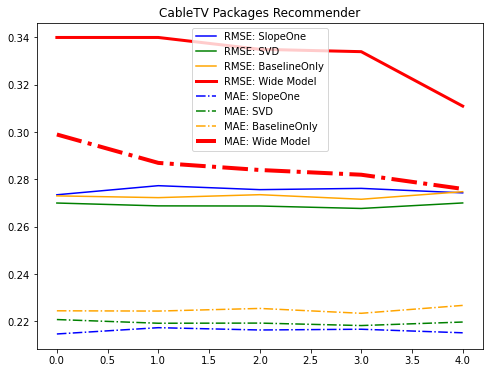

In [78]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(so_validate["test_rmse"], color='blue')
ax.plot(svd_validate["test_rmse"], color='green')
ax.plot(bo_validate["test_rmse"], color='orange')
ax.plot([0.340,0.340,0.335,0.334,0.311],linewidth=3, color='red')
ax.plot(so_validate["test_mae"], linestyle='dashdot', color='blue')
ax.plot(svd_validate["test_mae"], linestyle='dashdot', color='green')
ax.plot(bo_validate["test_mae"], linestyle='dashdot', color='orange')
ax.plot([0.299,0.287,0.284,0.282,0.276],linewidth=4, linestyle='dashdot', color='red')
# plt.xticks(np.arange(0, 30, 0.5))
plt.title("CableTV Packages Recommender", loc="center")
plt.legend(["RMSE: SlopeOne","RMSE: SVD","RMSE: BaselineOnly","RMSE: Wide Model",
           "MAE: SlopeOne","MAE: SVD","MAE: BaselineOnly","MAE: Wide Model"])

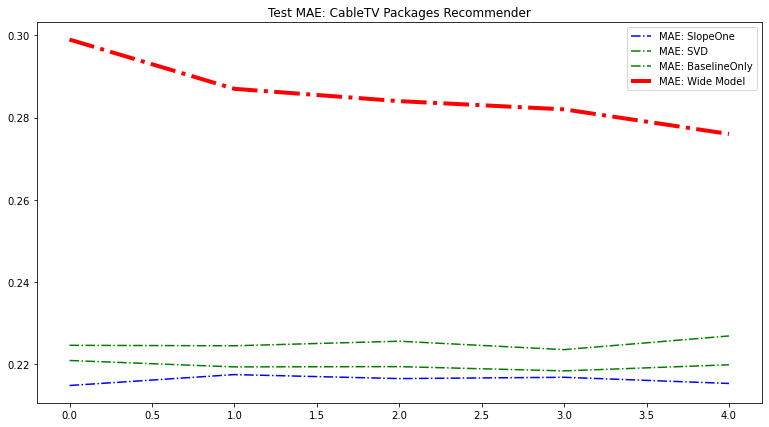

In [79]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_mae"], linestyle='dashdot', color='blue')
ax.plot(svd_validate["test_mae"], linestyle='dashdot', color='green')
ax.plot(bo_validate["test_mae"], linestyle='dashdot', color='green')
ax.plot([0.299,0.287,0.284,0.282,0.276],linewidth=4, linestyle='dashdot', color='red')
# plt.xticks(np.arange(0, 4, 0.2))
plt.title("Test MAE: CableTV Packages Recommender", loc="center")
plt.legend(["MAE: SlopeOne","MAE: SVD","MAE: BaselineOnly","MAE: Wide Model"])

# Ensamble Recommender Model